In [ ]:
import random
import numpy as np
#Reference: https://scipython.com/book2/chapter-6-numpy/examples/simulating-radioactive-decay/

def decay_sim(thalf, N0=500, tgrid=None, nhalflives=4):
    """Simulate the radioactive decay of N0 nuclei.

    thalf is the half-life in some units of time.
    If tgrid is provided, it should be a sequence of evenly-spaced time points
    to run the simulation on.
    If tgrid is None, it is calculated from nhalflives, the number of
    half-lives to run the simulation for.

    """

    # Calculate the lifetime from the half-life.
    tau = thalf / np.log(2)

    if tgrid is None:
        # Create a grid of Nt time points up to tmax.
        Nt, tmax = 100, thalf * nhalflives
        tgrid, dt = np.linspace(0, tmax, Nt, retstep=True)
    else:
        # tgrid was provided: deduce Nt and the time step, dt.
        Nt = len(tgrid)
        dt = tgrid[1] - tgrid[0]

    N = np.empty(Nt, dtype=int)
    N[0] = N0
    # The probability that a given nucleus will decay in time dt.
    p = dt / tau
    for i in range(1, Nt):
        # At each time step, start with the undecayed nuclei from the previous.
        N[i] = N[i-1]
        # Consider each nucleus in turn and decide whether it decays or not.
        for j in range(N[i-1]):
            r = random.random()
            if r < p:
                # This nucleus decays.
                N[i] -= 1 
    return tgrid, N
'''

N0 = 500
# Half life of 14C in years.
thalf = 5730

# Use Nt time steps up to tmax years.
Nt, tmax = 100, 20000
tgrid = np.linspace(0, tmax, Nt)


#_, Ns_sims = decay_sim(thalf, N0, tgrid)

#print(Ns_sims)
'''

In [45]:
#Ben Moreau

#Simulate a particle decay with a exponential distribution



from matplotlib import pyplot as plt
from scipy import optimize

half_life_real = 1000#seconds
Num_Sim=100
Num_Decays=10
N0 = 500

LikelihoodsH=[]
#Define a function that determines the likelihood of a given result
def Like(Half):
  
  Exp_Value = N0*2**(-tmax/Half)
  #print(tmax,Half)
  #Using the likelihood function for continuous variables, from https://en.wikipedia.org/wiki/Maximum_likelihood_estimation
  #The second term in the exponent of likelihood depends on the expectation value
  h=0
  for i in range(len(Num_remains)):
    h+=(Num_remains[i]-Exp_Value)**2#-Likelihood Summation term
  #print(h,Num_remains[i],Exp_Value)
  return h

for m in range(Num_Sim):
  Num_remains=[]
  
  for i in range(Num_Decays):
    
    # Half life in years.
    thalf = half_life_real

    # Use Nt time steps up to tmax seconds.
    Nt, tmax = 500, thalf*5
    tgrid = np.linspace(0, tmax, Nt)


    _, Ns_sims = decay_sim(thalf, N0, tgrid)
    Num_remains.append(Ns_sims[len(Ns_sims)-1])
  result = optimize.minimize_scalar(Like,[100,1000000],method="Brent")
  #print(result)
  LikelihoodsH.append(result.x)

                

995.9485881928348


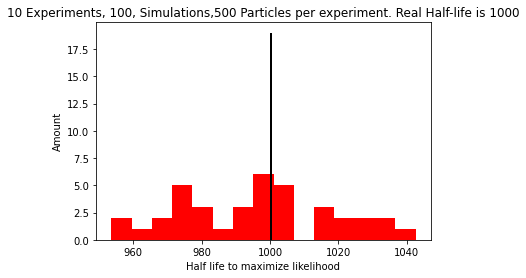

In [44]:
plt.hist(LikelihoodsH,color="Red",bins=15)
L=[]
for i in range(int(len(LikelihoodsH)/2)):
  L.append(thalf)
plt.hist(L,color="black",bins=2)
plt.title(str(Num_Decays) + " Experiments, " +str(Num_Sim) + ", Simulations,"+ str(N0)+" Particles per experiment. Real Half-life is " +str(half_life_real) )
plt.xlabel("Half life to maximize likelihood")
plt.ylabel("Amount")
print("The average found HL is",sum(LikelihoodsH)/len(LikelihoodsH))
plt.show()